In [57]:
import numpy as np

In [58]:
GLOBAL_PRECISION = 8

def Newton(func, derivative, startEstimation, m=1, realRoot=None, maxIter=100):
    """
    Usage:
    :param func: The function to be solved.
    :param derivative: Derivative function of 1st order of func.
    :param m: The multiplicity of roots.
    :param maxIter: Maximum of iteration.
    :return: Optimal approximation near given starting estimation.
    """
    currentPoint = startEstimation
    tolerance = 10**(-GLOBAL_PRECISION)
    count = 0
    newPoint = float('inf')
    while count < maxIter:
        count += 1
        try:
            newPoint = currentPoint - func(currentPoint)/derivative(currentPoint)*m
        except OverflowError:
            print("OverflowError.")
            return None
        except ZeroDivisionError:
            print("ZeroDivisionError.")
            break
        print(f"Iter of {count:2d}, newPoint: {newPoint}.")
        if abs(newPoint - currentPoint) <= tolerance: break
        currentPoint = newPoint
    if m > 1: print("Improved Newton's method.")
    print(f"Newton's method iterated of {count} times, with result: {newPoint:.{GLOBAL_PRECISION}f}")
    print(f"    Backward Error (BE): ", abs(func(newPoint)))
    if realRoot is not None: print(f"    Forward Error (FE): ", abs(newPoint-realRoot))
    print()

1. 每个方程都是单根，使用牛顿方法求近似根，精确到小数点后8位。
$$
\begin{align*}
(a) & x^3=2x+2\\
(b) & e^x+x=7\\
(c) & e^x+\sin x=4\\
\end{align*}
$$

In [59]:
Newton(lambda x: x**3-2*x-2, lambda x: 3*x**2-2, 2)
Newton(lambda x: np.exp(x)+x-7, lambda x: np.exp(x)+1, 2)
Newton(lambda x: np.exp(x)+np.sin(x)-4, lambda x: np.exp(x)+np.cos(x), 1)

Iter of  1, newPoint: 1.8.
Iter of  2, newPoint: 1.7699481865284974.
Iter of  3, newPoint: 1.769292662905941.
Iter of  4, newPoint: 1.7692923542386998.
Iter of  5, newPoint: 1.7692923542386314.
Newton's method iterated of 5 times, with result: 1.76929235
    Backward Error (BE):  0.0

Iter of  1, newPoint: 1.7152175321327054.
Iter of  2, newPoint: 1.6735727096837743.
Iter of  3, newPoint: 1.6728219360354273.
Iter of  4, newPoint: 1.6728216986289302.
Iter of  5, newPoint: 1.6728216986289066.
Newton's method iterated of 5 times, with result: 1.67282170
    Backward Error (BE):  8.881784197001252e-16

Iter of  1, newPoint: 1.1351038268723292.
Iter of  2, newPoint: 1.129988671126997.
Iter of  3, newPoint: 1.129980498671607.
Iter of  4, newPoint: 1.1299804986508324.
Newton's method iterated of 4 times, with result: 1.12998050
    Backward Error (BE):  0.0



2. 同上
$$
\begin{align*}
(a) & x^5+x=1\\
(b) & \sin x=6x+5\\
(c) & \ln x+x^2=3\\
\end{align*}
$$

In [60]:
Newton(lambda x: x**5+x-1, lambda x: 5*x**4+1, 0.9)
Newton(lambda x: np.sin(x)-6*x-5, lambda x: np.cos(x)-6, -1)
Newton(lambda x: np.log(x)+x**2-3, lambda x: 1/x+2*x, 2)

Iter of  1, newPoint: 0.7854129190515127.
Iter of  2, newPoint: 0.756374651748251.
Iter of  3, newPoint: 0.7548813370204607.
Iter of  4, newPoint: 0.7548776662687855.
Iter of  5, newPoint: 0.7548776662466927.
Newton's method iterated of 5 times, with result: 0.75487767
    Backward Error (BE):  1.1102230246251565e-16

Iter of  1, newPoint: -0.9709637741733408.
Iter of  2, newPoint: -0.9708989238235813.
Iter of  3, newPoint: -0.9708989235042558.
Newton's method iterated of 3 times, with result: -0.97089892
    Backward Error (BE):  0.0

Iter of  1, newPoint: 1.6237450709866788.
Iter of  2, newPoint: 1.592351773058945.
Iter of  3, newPoint: 1.5921429462409797.
Iter of  4, newPoint: 1.592142937058094.
Newton's method iterated of 4 times, with result: 1.59214294
    Backward Error (BE):  4.440892098500626e-16



3. 使用牛尽可能精确的找到唯一根，并确定多重性。然后使用改进牛二次收敛到根，报告每个方法中最优近似的前向和后向误差。
$$
\begin{align*}
(a) & f(x)=27x^3+54x^2+36x+8\\
(b) & f(x)=36x^4-12x^3+37x^2-12x+1\\
\end{align*}
$$

In [61]:
# f1 = (3x+2)^3, so m=3
f1 = lambda x: 27*x**3+54*x**2+36*x+8
f1Dev = lambda x: 81*x**2+108*x+36
Newton(f1, f1Dev, -1, realRoot=-2/3)
Newton(f1, f1Dev, -1, 3, -2/3)


Iter of  1, newPoint: -0.8888888888888888.
Iter of  2, newPoint: -0.8148148148148153.
Iter of  3, newPoint: -0.7654320987654344.
Iter of  4, newPoint: -0.7325102880658484.
Iter of  5, newPoint: -0.7105624142661221.
Iter of  6, newPoint: -0.6959304983996252.
Iter of  7, newPoint: -0.686175887822014.
Iter of  8, newPoint: -0.6796728141035255.
Iter of  9, newPoint: -0.6753374316244595.
Iter of 10, newPoint: -0.6724471766385134.
Iter of 11, newPoint: -0.670520339981108.
Iter of 12, newPoint: -0.6692357822101918.
Iter of 13, newPoint: -0.6683794103600941.
Iter of 14, newPoint: -0.6678084957874146.
Iter of 15, newPoint: -0.6674278860942462.
Iter of 16, newPoint: -0.6671741463528406.
Iter of 17, newPoint: -0.6670049866650646.
Iter of 18, newPoint: -0.6668922135220492.
Iter of 19, newPoint: -0.6668170325112078.
Iter of 20, newPoint: -0.6667669096693135.
Iter of 21, newPoint: -0.6667334969167846.
Iter of 22, newPoint: -0.6667112144374834.
Iter of 23, newPoint: -0.6666963842805737.
Iter of 24, n

In [62]:
GLOBAL_PRECISION = 10
f2 = lambda x: 36*x**4-12*x**3+37*x**2-12*x+1
f2Dev = lambda x: 144*x**3-36*x**2+74*x-12
Newton(f2, f2Dev, 1, realRoot=1/6)

# root: 0.1666667=1/6
print(f2Dev(1/6))
f2Dev2nd = lambda x: 432*x**2-72*x+74
print(f2Dev2nd(1/6))  # 74.0, so m=2
Newton(f2, f2Dev, 1, 2, 1/6)

Iter of  1, newPoint: 0.7058823529411764.
Iter of  2, newPoint: 0.4908911999422236.
Iter of  3, newPoint: 0.3472069103798635.
Iter of  4, newPoint: 0.2617190630510611.
Iter of  5, newPoint: 0.2152742061890658.
Iter of  6, newPoint: 0.1912110796438275.
Iter of  7, newPoint: 0.17899418667871594.
Iter of  8, newPoint: 0.1728435770052053.
Iter of  9, newPoint: 0.1697583202256758.
Iter of 10, newPoint: 0.16821328162128893.
Iter of 11, newPoint: 0.16744016974306009.
Iter of 12, newPoint: 0.1670534669229911.
Iter of 13, newPoint: 0.16686007895160593.
Iter of 14, newPoint: 0.16676337584548143.
Iter of 15, newPoint: 0.16671502201482305.
Iter of 16, newPoint: 0.16669084453037722.
Iter of 17, newPoint: 0.1666787556459892.
Iter of 18, newPoint: 0.16667271116802387.
Iter of 19, newPoint: 0.1666696889205409.
Iter of 20, newPoint: 0.1666681777944379.
Iter of 21, newPoint: 0.16666742223124803.
Iter of 22, newPoint: 0.16666704444589076.
Iter of 23, newPoint: 0.16666685555958682.
Iter of 24, newPoint: 0

4. 同上
$$
\begin{align*}
(a) & f(x)=2e^{x-1}-x^2-1 \\
(b) & f(x)=\ln{(3-x)}+x-2\\
\end{align*}
$$

In [63]:
GLOBAL_PRECISION = 10
f1 = lambda x: 2*np.exp(x-1)-x**2-1
f1Dev = lambda x: 2*np.exp(x-1)-2*x
Newton(f1, f1Dev, 2, realRoot=1)

# root: 1.0000049890=1
print(f1Dev(1))
f1Dev2nd = lambda x: 2*np.exp(x-1)-2
print(f1Dev2nd(1))
f1Dev3rd = lambda x: 2*np.exp(x-1)
print(f1Dev3rd(1))  # 2.0, so m=3
Newton(f1, f1Dev, 2, 3, 1)

Iter of  1, newPoint: 1.6961055955886666.
Iter of  2, newPoint: 1.4781129022841164.
Iter of  3, newPoint: 1.325285123718804.
Iter of  4, newPoint: 1.2198578036791048.
Iter of  5, newPoint: 1.147933877018088.
Iter of  6, newPoint: 1.0992364043288367.
Iter of  7, newPoint: 1.0664329490951705.
Iter of  8, newPoint: 1.0444117653098688.
Iter of  9, newPoint: 1.0296627941764975.
Iter of 10, newPoint: 1.0197996854790885.
Iter of 11, newPoint: 1.013210694324289.
Iter of 12, newPoint: 1.0088119816606647.
Iter of 13, newPoint: 1.0058768126768656.
Iter of 14, newPoint: 1.0039188348476273.
Iter of 15, newPoint: 1.0026129832523747.
Iter of 16, newPoint: 1.0017421784980658.
Iter of 17, newPoint: 1.0011615365660151.
Iter of 18, newPoint: 1.0007743950552086.
Iter of 19, newPoint: 1.0005162800256209.
Iter of 20, newPoint: 1.0003441946068463.
Iter of 21, newPoint: 1.0002294668490932.
Iter of 22, newPoint: 1.0001529811142205.
Iter of 23, newPoint: 1.0001019868997063.
Iter of 24, newPoint: 1.0000680024888

In [64]:
GLOBAL_PRECISION = 10
f2 = lambda x: np.log(3-x)+x-2
f2Dev = lambda x: -1/(3-x)+1
Newton(f2, f2Dev, 1, realRoot=2)

# root: 1.9999999893=2
print(f2Dev(2))
f2Dev2nd = lambda x: -1/(3-x)**2
print(f2Dev2nd(2))  # -1, so m=2
Newton(f2, f2Dev, 1, 2, 2)

Iter of  1, newPoint: 1.6137056388801092.
Iter of  2, newPoint: 1.8278078110078229.
Iter of  3, newPoint: 1.9184595973099838.
Iter of  4, newPoint: 1.960294855920021.
Iter of  5, newPoint: 1.980405082514777.
Iter of  6, newPoint: 1.9902659150255904.
Iter of  7, newPoint: 1.9951486731665184.
Iter of  8, newPoint: 1.9975782496580488.
Iter of  9, newPoint: 1.9987901011262847.
Iter of 10, newPoint: 1.9993952943915223.
Iter of 11, newPoint: 1.9996977081221345.
Iter of 12, newPoint: 1.9998488692886123.
Iter of 13, newPoint: 1.999924438450685.
Iter of 14, newPoint: 1.9999622201771585.
Iter of 15, newPoint: 1.9999811103280212.
Iter of 16, newPoint: 1.9999905552183954.
Iter of 17, newPoint: 1.9999952776226628.
Iter of 18, newPoint: 1.9999976388203786.
Iter of 19, newPoint: 1.9999988193974627.
Iter of 20, newPoint: 1.9999994097729834.
Iter of 21, newPoint: 1.999999704715553.
Iter of 22, newPoint: 1.9999998521014242.
Iter of 23, newPoint: 1.999999925666617.
Iter of 24, newPoint: 1.999999961512361

5. 一个发射井由高10m的圆柱和顶部一个半球组成，体积400m^3，求底部半径，精确到小数点后4位。

In [65]:
GLOBAL_PRECISION = 10
f = lambda x: 10*np.pi*x**2+2/3*np.pi*x**3-400
dev = lambda x: 20*np.pi*x+2*np.pi*x**2
Newton(f, dev, 2)

Iter of  1, newPoint: 3.708137940420478.
Iter of  2, newPoint: 3.2736559292701792.
Iter of  3, newPoint: 3.2364543215365913.
Iter of  4, newPoint: 3.2361874339837966.
Iter of  5, newPoint: 3.2361874202877363.
Iter of  6, newPoint: 3.236187420287736.
Newton's method iterated of 6 times, with result: 3.2361874203
    Backward Error (BE):  0.0



6. 高10cm的圆锥有60cm^3的冰淇凌，顶部是半球，求冰淇凌球半径，精确到小数点后4位。

In [66]:
GLOBAL_PRECISION = 10
f = lambda x: (10*np.pi*x**2)/3+2/3*np.pi*x**3-60
dev = lambda x: 20*np.pi*x/3+2*np.pi*x**2
Newton(f, dev, 2)

Iter of  1, newPoint: 2.0202465548919113.
Iter of  2, newPoint: 2.0201073278281165.
Iter of  3, newPoint: 2.0201073212197014.
Iter of  4, newPoint: 2.0201073212197014.
Newton's method iterated of 4 times, with result: 2.0201073212
    Backward Error (BE):  1.4210854715202004e-14



7. 在区间$[-2,2]$上考虑函数$f(x)=e^{\sin^3{x}}+x^6-2x^4-x^3-1$.画出这个区间上的函数，找出所有三个根，精确到小数点后6位。确定哪个根是二次收敛，并找出线性收敛的根对应的多重性。

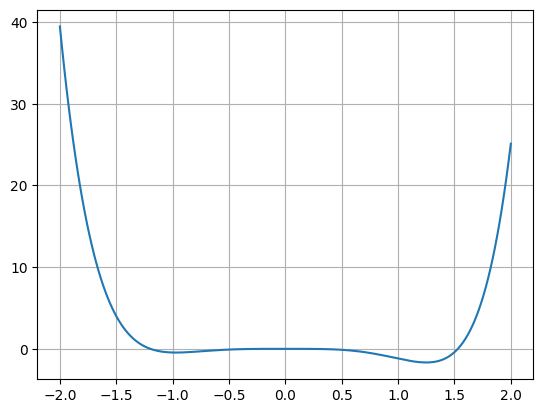

In [67]:
import matplotlib.pyplot as plt

f = lambda x: np.exp(np.sin(x)**3)+x**6-2*x**4-x**3-1
X = np.linspace(-2, 2, 200)
plt.plot(X, f(X))
axes = plt.gca()
axes.grid()
plt.show()

In [70]:
# 根据图像可以看出只有0为非二次收敛，接下来计算多重性
dev1 = lambda x: np.cos(x)*3*np.sin(x)**2*np.exp(np.sin(x)**3)+6*x**5-8*x**3-3*x**2
dev2 = lambda x: 9*np.exp(np.sin(x)**3)*np.cos(x)**2*np.sin(x)**4-3*np.exp(np.sin(x)**3)*np.sin(x)**3 \
    +6*np.exp(np.sin(x)**3)*np.cos(x)**2*np.sin(x)+30*x**4-24*x**2-6*x
dev3 = lambda x: 27*np.exp(np.sin(x)**3)*np.cos(x)**3*np.sin(x)**6-27*np.exp(np.sin(x)**3)*np.cos(x)*np.sin(x)**5 \
    +54*np.exp(np.sin(x)**3)*np.cos(x)**3*np.sin(x)**3-21*np.exp(np.sin(x)**3)*np.cos(x)*np.sin(x)**2 \
    +6*np.exp(np.sin(x)**3)*np.cos(x)**3+120*x**3-48*x-6
# dev4懒得算了，看答案知道m=4
print(dev1(0), dev2(0), dev3(0))

Newton(f, dev1, -1.5)
Newton(f, dev1, 0.5, m=4, realRoot=0)
Newton(f, dev1, 1.5)

0.0 0.0 0.0
Iter of  1, newPoint: -1.3410384917095008.
Iter of  2, newPoint: -1.243553239661027.
Iter of  3, newPoint: -1.2039922844168507.
Iter of  4, newPoint: -1.1977666124939046.
Iter of  5, newPoint: -1.197623796008961.
Iter of  6, newPoint: -1.1976237221335897.
Iter of  7, newPoint: -1.1976237221335697.
Newton's method iterated of 7 times, with result: -1.1976237221
    Backward Error (BE):  6.661338147750939e-16

Iter of  1, newPoint: -0.031661952440123375.
Iter of  2, newPoint: 7.533888145812989e-05.
Iter of  3, newPoint: 7.533888145812989e-05.
Improved Newton's method.
Newton's method iterated of 3 times, with result: 0.0000753389
    Backward Error (BE):  0.0
    Forward Error (FE):  7.533888145812989e-05

Iter of  1, newPoint: 1.5332246760734796.
Iter of  2, newPoint: 1.5301622402064223.
Iter of  3, newPoint: 1.5301335106759133.
Iter of  4, newPoint: 1.5301335081666154.
Iter of  5, newPoint: 1.5301335081666156.
Newton's method iterated of 5 times, with result: 1.5301335082
 

8. 同上，区间$[0,3], f(x)=94\cos^3{x}-24\cos x+177\sin^2{x}-108\sin^4{x}-72\cos^3{x}\sin^2{x}-65$

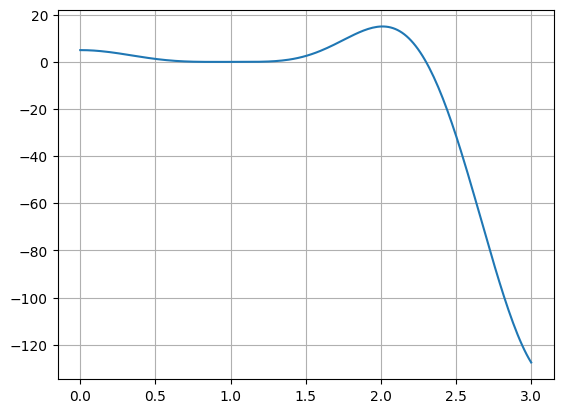

In [72]:
f = lambda x: 94*np.cos(x)**3-24*np.cos(x)+177*np.sin(x)**2-108*np.sin(x)**4-72*np.cos(x)**3*np.sin(x)**2-65
X = np.linspace(0, 3, 200)
plt.plot(X, f(X))
axes = plt.gca()
axes.grid()
plt.show()

In [75]:
# 求导不易，略过

9. 使用牛顿法找出函数$f(x)=14xe^{x-2}-12e^{x-2}-7x^3+20x^2-26x+12,x\in[0,3]$的根。对于每个根，打印对应的迭代序列，误差$e_i$，和收敛到非0极限的相关误差率$e_{i+1}/e_i^2$或者$e_{i+1}/e_i$，把该极限和由定理1.11中得到的期望M或者定理1.12中得到的S进行匹配。

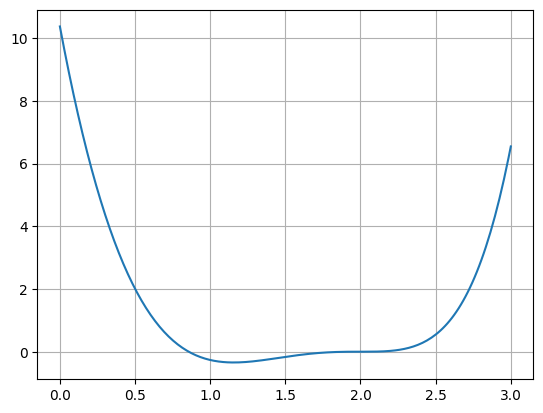

In [76]:
f = lambda x: 14*x*np.exp(x-2)-12*np.exp(x-2)-7*x**3+20*x**2-26*x+12
X = np.linspace(0, 3, 200)
plt.plot(X, f(X))
axes = plt.gca()
axes.grid()
plt.show()

In [78]:
dev = lambda x: 2*np.exp(x-2)+14*x*np.exp(x-2)-21*x**2+40*x-26
Newton(f, dev, 1)
Newton(f, dev, 1.5)

Iter of  1, newPoint: 0.7627845835848802.
Iter of  2, newPoint: 0.840821691829043.
Iter of  3, newPoint: 0.8565332220104341.
Iter of  4, newPoint: 0.8571419618530481.
Iter of  5, newPoint: 0.8571428571409215.
Iter of  6, newPoint: 0.857142857142857.
Newton's method iterated of 6 times, with result: 0.8571428571
    Backward Error (BE):  1.7763568394002505e-15

Iter of  1, newPoint: 1.7373933654065983.
Iter of  2, newPoint: 1.836920380655232.
Iter of  3, newPoint: 1.8952930161752548.
Iter of  4, newPoint: 1.931733476345266.
Iter of  5, newPoint: 1.9551157924042266.
Iter of  6, newPoint: 1.970341229099285.
Iter of  7, newPoint: 1.9803408977482413.
Iter of  8, newPoint: 1.9869432361098975.
Iter of  9, newPoint: 1.9913170895684444.
Iter of 10, newPoint: 1.9942209016970196.
Iter of 11, newPoint: 1.9961514673869911.
Iter of 12, newPoint: 1.9974361704405685.
Iter of 13, newPoint: 1.9982916042929133.
Iter of 14, newPoint: 1.998861434630733.
Iter of 15, newPoint: 1.9992411189572343.
Iter of 16,

In [93]:
def Newton2(func, derivative, startEstimation, realRoot, m=False, maxIter=100):
    currentPoint = startEstimation
    tolerance = 0.1**GLOBAL_PRECISION
    i = 0
    newPoint = float('inf')
    eLast = float('inf')
    while i < maxIter:
        try:
            newPoint = currentPoint - func(currentPoint)/derivative(currentPoint)
        except OverflowError:
            print("OverflowError.")
            return None
        except ZeroDivisionError:
            print("ZeroDivisionError.")
            break
        ei = abs(realRoot-newPoint)
        if m:
            print(f"Iter of {i:2d}  x_i: {newPoint:.15f}  e_i: {ei:.15f}  e_i/e_i-1: {ei/eLast}")
        else:
            print(f"Iter of {i:2d}  x_i: {newPoint:.15f}  e_i: {ei:.15f}  e_i/e_i-1^2: {ei/eLast**2.0}")
        eLast = ei
        if abs(newPoint - currentPoint) <= tolerance: break
        currentPoint = newPoint
        i += 1
    print()


In [96]:
GLOBAL_PRECISION = 6
Newton2(f, dev, 0.5, 0.8571428571)
# TODO: 为什么不收敛

Newton2(f, dev, 1.5, 2.0, m=True)
# TODO: 计算多重性，重构Newton
# S = 2/3

Iter of  0  x_i: 0.717419008208511  e_i: 0.139723848891489  e_i/e_i-1^2: 0.0
Iter of  1  x_i: 0.825072333048116  e_i: 0.032070524051884  e_i/e_i-1^2: 1.6427254134113396
Iter of  2  x_i: 0.854901301655348  e_i: 0.002241555444652  e_i/e_i-1^2: 2.179402136570166
Iter of  3  x_i: 0.857130819050620  e_i: 0.000012038049380  e_i/e_i-1^2: 2.3958363474332405
Iter of  4  x_i: 0.857142856793066  e_i: 0.000000000306934  e_i/e_i-1^2: 2.1180303434436385
Iter of  5  x_i: 0.857142857142857  e_i: 0.000000000042857  e_i/e_i-1^2: 454918343.5704114

Iter of  0  x_i: 1.737393365406598  e_i: 0.262606634593402  e_i/e_i-1: 0.0
Iter of  1  x_i: 1.836920380655232  e_i: 0.163079619344768  e_i/e_i-1: 0.6210034243699395
Iter of  2  x_i: 1.895293016175255  e_i: 0.104706983824745  e_i/e_i-1: 0.6420605115798275
Iter of  3  x_i: 1.931733476345266  e_i: 0.068266523654734  e_i/e_i-1: 0.6519767942986117
Iter of  4  x_i: 1.955115792404227  e_i: 0.044884207595773  e_i/e_i-1: 0.6574848870696945
Iter of  5  x_i: 1.9703412290

10. 画出$f(x)=54x^6+45x^5-102x^4-69x^3+35x^2+16x-4$在区间$[-2,2]$上的图像，使用牛顿法找出该区间上所有五个根。对于哪些根线性收敛，哪些二次收敛？

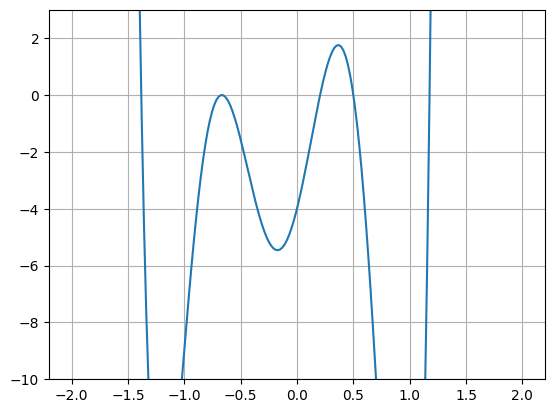

In [100]:
f = lambda x: 54*x**6+45*x**5-102*x**4-69*x**3+35*x**2+16*x-4
X = np.linspace(-2, 2, 200)
plt.plot(X, f(X))
plt.ylim(-10, 3)
axes = plt.gca()
axes.grid()
plt.show()

In [101]:
dev = lambda x: 324*x**5+225*x**4-408*x**3-207*x**2+70*x+16
Newton(f, dev, -1.5)
Newton(f, dev, -0.5)
Newton(f, dev, 0)
Newton(f, dev, 0.6)
Newton(f, dev, 1.25)

Iter of  1, newPoint: -1.4185973700688792.
Iter of  2, newPoint: -1.3863317391163943.
Iter of  3, newPoint: -1.3814057833998454.
Iter of  4, newPoint: -1.3812985321165292.
Iter of  5, newPoint: -1.3812984820440055.
Newton's method iterated of 5 times, with result: -1.381298
    Backward Error (BE):  2.263078613395919e-12

Iter of  1, newPoint: -0.5988142292490118.
Iter of  2, newPoint: -0.6344820841582173.
Iter of  3, newPoint: -0.6509143560739481.
Iter of  4, newPoint: -0.6588666208029729.
Iter of  5, newPoint: -0.6627846901367699.
Iter of  6, newPoint: -0.6647300742425561.
Iter of  7, newPoint: -0.6656994553409142.
Iter of  8, newPoint: -0.6661833304899479.
Iter of  9, newPoint: -0.666425065734369.
Iter of 10, newPoint: -0.6665458829626849.
Iter of 11, newPoint: -0.6666062790017977.
Iter of 12, newPoint: -0.6666364738806203.
Iter of 13, newPoint: -0.6666515705353098.
Iter of 14, newPoint: -0.6666591186661682.
Iter of 15, newPoint: -0.6666628926809902.
Iter of 16, newPoint: -0.6666647

In [102]:
# 根0.6666666=2/3为重根，讨论多重性
dev2 = lambda x: 1620*x**4+900*x**3-1224*x**2-414*x+70
print(dev2(2/3))

-163.33333333333348


In [103]:
# so m=2
Newton(f, dev, -.5, m=2)

Iter of  1, newPoint: -0.6976284584980237.
Iter of  2, newPoint: -0.6671450105905085.
Iter of  3, newPoint: -0.6666667976726182.
Iter of  4, newPoint: -0.6666666660781232.
Improved Newton's method.
Newton's method iterated of 4 times, with result: -0.666667
    Backward Error (BE):  0.0



11. 使用理想气体定律：$PV=nRT$做初始估计,用牛求解van der Waals方程：
$$
(P+\frac{n^2a}{V^2})(V-nb)=nRT
$$
其中T=320, P=15, a(氧气)=1.36L^2-atm/mole^2, b=0.003183L/mole, n=1mole,R=0.0820578, 解V。

In [105]:
n = 1
R = 0.0820578
T = 320
P = 15
VEstimated = n*R*T/P
a = 1.36
b = 0.003183
f = lambda V: (P+n**2*a/V**2)*(V-n*b)-n*R*T
dev = lambda V: P-n**2*a/V**2-2*n**3*a*b/V**3
Newton(f, dev, VEstimated)


Iter of  1, newPoint: 1.700566109870888.
Iter of  2, newPoint: 1.7005325575548282.
Iter of  3, newPoint: 1.700532565665068.
Newton's method iterated of 3 times, with result: 1.700533
    Backward Error (BE):  2.8556712550198426e-11



12. 11中的氧气换成苯蒸汽：T=700k, P=20atm, a=18.0, b=0.1154。

In [106]:
T = 700
P = 20
a = 18
b = 0.1154
Newton(f, dev, VEstimated)

Iter of  1, newPoint: 2.883936591387851.
Iter of  2, newPoint: 2.6618858108540357.
Iter of  3, newPoint: 2.6643091550399425.
Iter of  4, newPoint: 2.664246966682198.
Iter of  5, newPoint: 2.664248550819081.
Iter of  6, newPoint: 2.664248510458366.
Newton's method iterated of 6 times, with result: 2.664249
    Backward Error (BE):  1.7732624257860152e-08



13. =
    1. 找出$f(x)=(1-\frac{3}{4x})^{\frac{1}{3}}$的根。
    2. 使用牛顿方法，初始估计在根附近，画出前50步的迭代。这是另外一种通过生成混乱轨迹是的牛顿方法可能失败的情形。
    3. 为什么定理1.11和定理1.12失效？

In [107]:
root = 3/4
f = lambda x: (1-3/(4*x))**(1/3)
dev = lambda x: (4*x**4*(4*x-3)**2)**(-1/3)
Newton(f, dev, 0.5, maxIter=50)
# TODO: 为什么出现了复数

Iter of  1, newPoint: (0.2499999999999999-0.43301270189221935j).
Iter of  2, newPoint: (1.1102230246251565e-16+0.8660254037844386j).
Iter of  3, newPoint: (-3.7499999999999996+2.1650635094610973j).
Iter of  4, newPoint: (-52.49999999999996+73.61215932167727j).
Iter of  5, newPoint: (-32264.999999999945-6408.587988004818j).
Iter of  6, newPoint: (-3999969959.999982-1654210365.8157508j).
Iter of  7, newPoint: (-5.305339100211965e+19-5.293433417288537e+19j).
Iter of  8, newPoint: (-1.9431554207260724e+40+1.1277095695970633e+40j).
Iter of  9, newPoint: (-1.0173627174893296e+81-1.7439800246496225e+81j).
Iter of 10, newPoint: (nan+nanj).
Iter of 11, newPoint: (nan+nanj).
Iter of 12, newPoint: (nan+nanj).
Iter of 13, newPoint: (nan+nanj).
Iter of 14, newPoint: (nan+nanj).
Iter of 15, newPoint: (nan+nanj).
Iter of 16, newPoint: (nan+nanj).
Iter of 17, newPoint: (nan+nanj).
Iter of 18, newPoint: (nan+nanj).
Iter of 19, newPoint: (nan+nanj).
Iter of 20, newPoint: (nan+nanj).
Iter of 21, newPoint

14. TL, Why bother

In [ ]:
# TODO: 做完14题